# EDA - Titanic
Create an account on kaggle.com and read the overview of the titanic competition at https://www.kaggle.com/c/titanic/overview, do the followings:

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the training dataset and rename it to titanic-train.csv and load it using pandas

In [3]:
# download the training dataset "train.csv", rename it "titanic-train.csv" and load it using pandas
df_train = pd.read_csv('../data/titanic_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- How many rows and features in the dataset?
- Which variable is the target for prediction? 
- Are there any null values? If yes, in which columns and how many?
- What are the data types of each feature?

In [ ]:
# 891 rows ,12 features (columns)
#Survived
# Yes 687 in cabin and 177 in age and 2 in embarked
#2 float,5 integer, 5 objects

- Drop the columns with null values from the dataframe
- Print out the info of the data frame after dropping the columns. How many columns are left?

In [4]:
df_train.drop(['Cabin','Age','Embarked'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


- Plot the Histograms for all numerical features with figure size 10x10
- Discribe each histogram and state any findings you may have for each

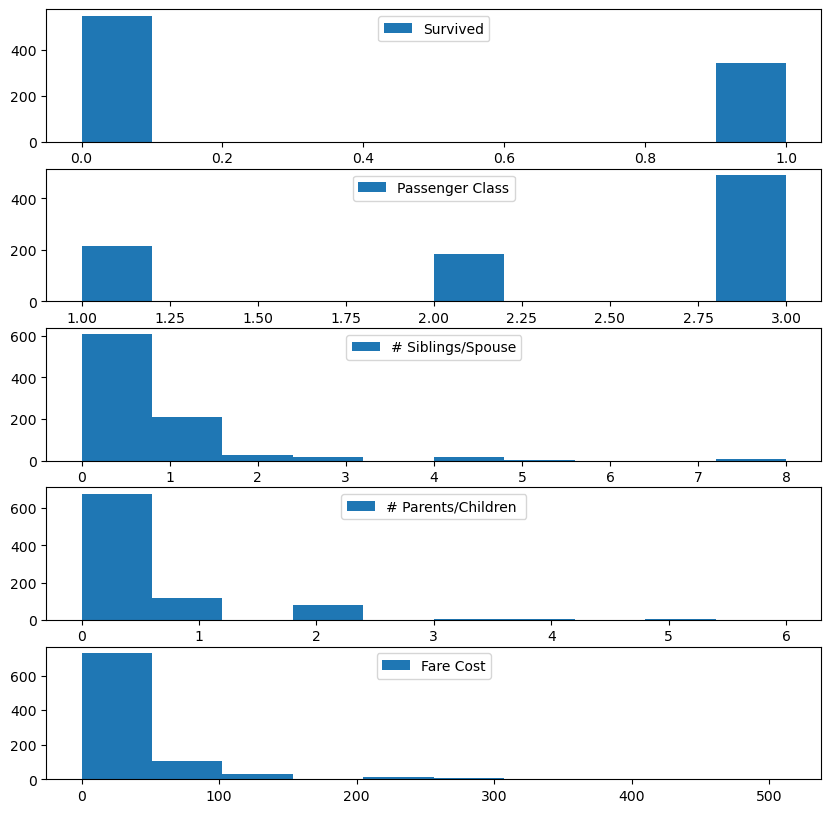

In [34]:
fig,ax =plt.subplots(5,1,figsize=(10,10))

ax[0].hist(data=df_train,x='Survived',label='Survived')
ax[1].hist(data=df_train,x='Pclass',label='Passenger Class')
ax[2].hist(data=df_train,x='SibSp',label='# Siblings/Spouse')
ax[3].hist(data=df_train,x='Parch',label='# Parents/Children ')
ax[4].hist(data=df_train,x='Fare',label='Fare Cost')
ax[0].legend(loc='upper center')
ax[1].legend(loc='upper center')
ax[2].legend(loc='upper center')
ax[3].legend(loc='upper center')
ax[4].legend(loc='upper center')


- Calculate the overall suvival rate: # of survival / total # of passengers
- Use python script. Do not hardcode any number.

In [38]:
df_train[df_train.Survived==1]['PassengerId'].count()/df_train['PassengerId'].count()

0.3838383838383838

- Create a bar chart for gender
- Calculate the survival rate based on gender using `groupby()`

In [63]:
#sns.countplot(data=df_train,x='Sex')
data=df_train[df_train.Survived==1].groupby('Sex')['PassengerId'].count().reset_index()

female=(data.iloc[0,1])/df_train[df_train.Sex=='female']['PassengerId'].count()
male=(data.iloc[1,1])/df_train[df_train.Sex=='male']['PassengerId'].count()
print(f"Female Survival Rate:{female}. Male Survival Rate:{male}")

Female Survival Rate:0.7420382165605095. Male Survival Rate:0.18890814558058924


 Based on the histograms above - choose features that you think may have outliers and create boxplots for those features to verify

{'whiskers': [<matplotlib.lines.Line2D at 0x1518a1ed0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1518a1ee910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1518a1caf90>],
 'medians': [<matplotlib.lines.Line2D at 0x1518a1efe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15189850850>],
 'means': []}

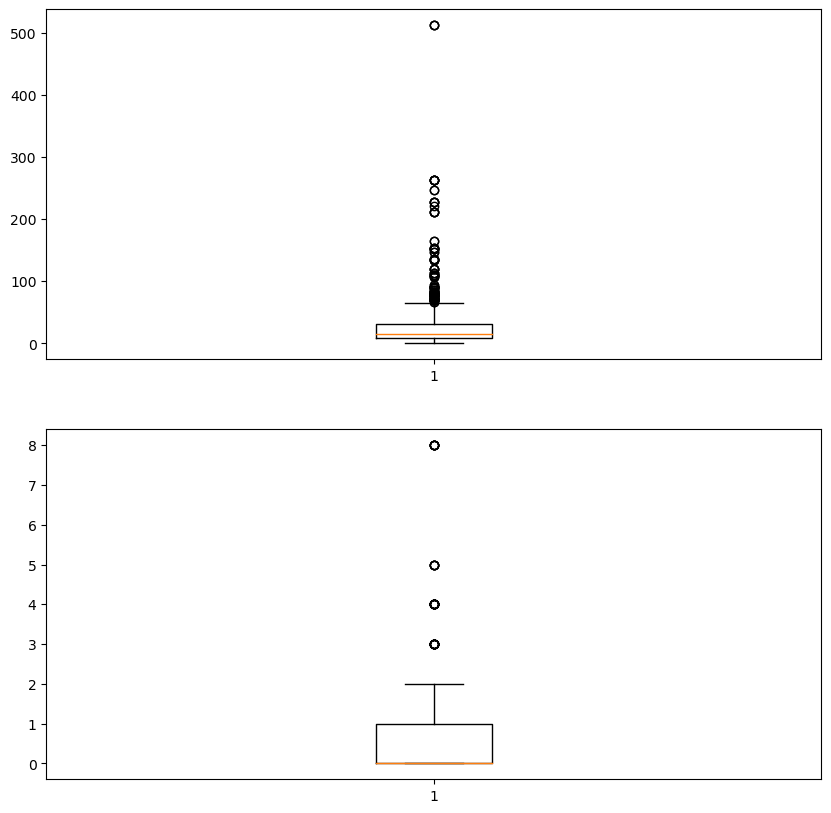

In [72]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].boxplot(data=df_train,x='Fare')
ax[1].boxplot(data=df_train,x='SibSp')

- Create a scatter plot for `Fare` feature to take a closer look at the data points. Hint: use `df.index` as x and use values of `Fare` as y
- By eye-balling the scatter chart - how many tickets are over $500?

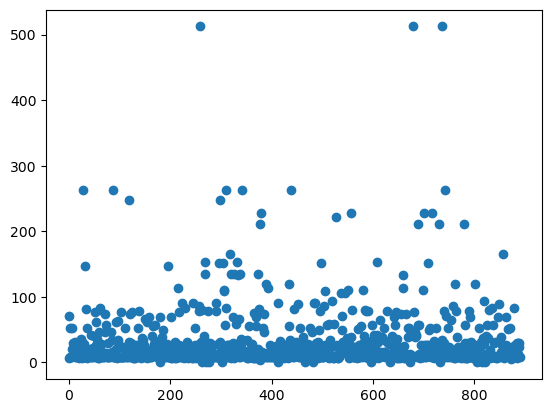

In [5]:
plt.scatter(data=df_train,x=df_train.index,y='Fare') 

# 3 are over 500

- Create plots check if there are any covariations among fare, # of siblings/spouses aboard, and survival?

<Axes: xlabel='Fare', ylabel='SibSp'>

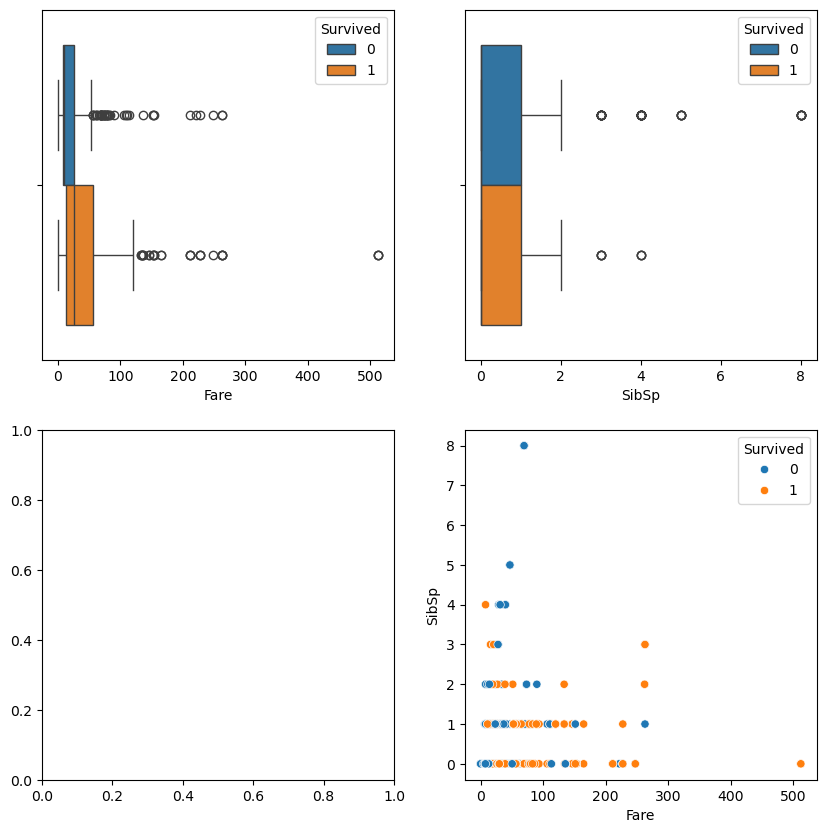

In [35]:
# figsize=(10,10)



df1=df_train.sort_values('Fare')


fig,ax =plt.subplots(2,2, figsize=(10,10))
#sns.scatterplot(data=df_train,x='Fare',y='SibSp',hue='Survived')
sns.boxplot(data=df_train,x='Fare',hue='Survived',ax=ax[0,0])
sns.boxplot(data=df_train,x='SibSp',hue='Survived',ax=ax[0,1])

sns.scatterplot(data=df_train,x='Fare',y='SibSp',hue='Survived',ax=ax[1,1])
#Yes the lower fare the more likely that there a passnger has a higher number of sibings and spouses aboard. Additioanlly,
#the survived group has a average ticket price higher than the deceased group.